In [65]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

In [66]:
data = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [67]:
data.head()
predict = data.SalePrice
log_predict = np.log(predict)
data.drop(['PID','Prop_Addr', 'mean_LotFrontage', 'lot_bucket','SalePrice','lat', 'long','GarageYrBlt'], axis = 1, inplace = True)

In [68]:
data.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,30,RL,64.9,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal
1,1049,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal
2,1049,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal
3,1001,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal
4,1039,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal


In [69]:
dummy = pd.get_dummies(data, drop_first = True)

# Finding the most important features
Iterate over many random seeds since the train and testR2 vary a lot since our dataset is so small


In [71]:
from collections import defaultdict
num_iters = 50

params = {'alpha' : np.linspace(1e-5,1e-3,100)}
lasso = Lasso(max_iter = 200000)
gs = GridSearchCV(lasso,param_grid=params, verbose = 3, cv = 5, n_jobs = -1)

d = defaultdict(list)
trainR2 = []
testR2 = []

for i in range(num_iters):
    print(i, end = '/r')
    np.random.seed(i)
    
    X_train, X_test, y_train, y_test = train_test_split(dummy,log_predict,test_size = .3)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    gs.fit(X_train ,y_train)
    best_estimator = gs.best_estimator_
    trainR2.append(best_estimator.score(X_train, y_train))
    testR2.append(best_estimator.score(X_test,y_test))
    
    
    important_features = pd.Series(best_estimator.coef_, 
                                  index = dummy.columns).sort_values(key = abs,ascending = False)

    
    for i, e in enumerate(important_features.index):
        d[e].append(i)
    
    
 
    
    
    
    

0/rFitting 5 folds for each of 100 candidates, totalling 500 fits
1/rFitting 5 folds for each of 100 candidates, totalling 500 fits
2/rFitting 5 folds for each of 100 candidates, totalling 500 fits
3/rFitting 5 folds for each of 100 candidates, totalling 500 fits
4/rFitting 5 folds for each of 100 candidates, totalling 500 fits
5/rFitting 5 folds for each of 100 candidates, totalling 500 fits
6/rFitting 5 folds for each of 100 candidates, totalling 500 fits
7/rFitting 5 folds for each of 100 candidates, totalling 500 fits
8/rFitting 5 folds for each of 100 candidates, totalling 500 fits
9/rFitting 5 folds for each of 100 candidates, totalling 500 fits
10/rFitting 5 folds for each of 100 candidates, totalling 500 fits
11/rFitting 5 folds for each of 100 candidates, totalling 500 fits
12/rFitting 5 folds for each of 100 candidates, totalling 500 fits
13/rFitting 5 folds for each of 100 candidates, totalling 500 fits
14/rFitting 5 folds for each of 100 candidates, totalling 500 fits
15/rF

In [52]:
# final_d = {k: v/num_iters for k, v in d.items()}

In [73]:
print(trainR2)
print(testR2)

[0.9311895759777074, 0.9403874635128605, 0.9463017875842183, 0.917230566635031, 0.9450895180197965, 0.9433605210849304, 0.9342859410064115, 0.929855652481026, 0.9444712318955747, 0.9269912107939434, 0.9417909609915951, 0.9337664241499337, 0.9220526126458887, 0.9226912746807578, 0.9381890108491897, 0.9282833444877251, 0.9443055038893277, 0.9396141014245037, 0.9426332031708788, 0.9369545626229551, 0.9315961402283415, 0.9452461061704251, 0.9285955379235528, 0.9414503888384191, 0.9368974312415435, 0.9308136513619614, 0.9383410427611052, 0.934484717086082, 0.9251345068849115, 0.9395379601197654, 0.9473475859710874, 0.9217039140653321, 0.9350612368596185, 0.9301149848247326, 0.9298419182962085, 0.9298278172053467, 0.9342658683256431, 0.9149454693251516, 0.9343960346711205, 0.942180025705313, 0.9403303967568867, 0.9384685183424613, 0.9406177464549581, 0.9255889622404097, 0.9433769204983816, 0.9463685911758569, 0.9253543291751039, 0.9314135244453918, 0.9226398088630745, 0.9290456945965958]
[0.

dict_keys(['GrLivArea', 'OverallQual', 'OverallCond', 'Condition2_PosN', 'Neighborhood_GrnHill', 'YearBuilt', 'TotalBsmtSF', 'LotArea', 'BsmtFinSF1', 'SaleCondition_Partial', 'ScreenPorch', 'Neighborhood_Somerst', 'Neighborhood_Crawfor', 'GarageCars', 'Functional_Maj2', 'TotRmsAbvGrd', 'SaleCondition_Normal', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'GarageArea', '1stFlrSF', 'GarageYrBlt_1928.0', 'BldgType_Twnhs', 'ExterCond_Fa', 'MSZoning_C (all)', 'Exterior1st_BrkFace', 'KitchenQual_Fa', 'BsmtFinSF2', 'Fireplaces', 'Functional_Typ', 'MSZoning_RL', 'GarageCond_Fa', 'Heating_GasW', 'BsmtExposure_Gd', 'Condition1_Norm', 'KitchenQual_TA', 'BsmtFullBath', 'EnclosedPorch', 'Neighborhood_NridgHt', 'BldgType_Duplex', 'GarageYrBlt_1965.0', 'CentralAir_Y', 'GarageYrBlt_2008.0', 'FullBath', 'YearRemodAdd', 'Foundation_PConc', 'GarageYrBlt_2009.0', 'Neighborhood_NoRidge', 'Neighborhood_Edwards', 'Neighborhood_ClearCr', 'KitchenQual_Gd', 'HeatingQC_Fa', 'LandContour_HLS', 'HeatingQC_TA', '

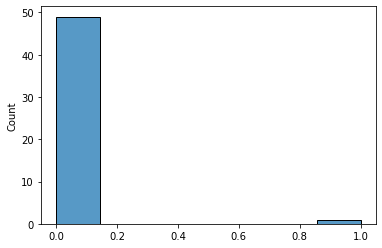

In [78]:
import pprint
import seaborn as sns


sns.histplot(d['GrLivArea'])


In [55]:
dict(sorted(final_d.items(), key=lambda item: item[1]))

{'GrLivArea': 0.02,
 'OverallQual': 1.04,
 'OverallCond': 2.38,
 'TotalBsmtSF': 3.78,
 'YearBuilt': 5.24,
 'BsmtFinSF1': 6.96,
 'GarageCars': 10.38,
 'Neighborhood_Crawfor': 11.62,
 'SaleCondition_Partial': 12.34,
 'Neighborhood_Somerst': 14.94,
 'BldgType_Twnhs': 15.72,
 'Neighborhood_MeadowV': 16.06,
 'Neighborhood_StoneBr': 17.58,
 'SaleCondition_Normal': 19.4,
 'ScreenPorch': 20.28,
 'CentralAir_Y': 20.58,
 'MSZoning_C (all)': 20.8,
 'GarageArea': 20.86,
 'Exterior1st_BrkFace': 22.36,
 'BsmtFullBath': 26.86,
 'Neighborhood_NridgHt': 27.3,
 'BldgType_Duplex': 29.28,
 'KitchenQual_TA': 30.16,
 'Functional_Typ': 32.34,
 'Condition1_Norm': 33.12,
 'YearRemodAdd': 33.42,
 'BsmtExposure_Gd': 33.58,
 'Neighborhood_ClearCr': 33.68,
 'KitchenQual_Fa': 34.54,
 'MSZoning_RL': 36.26,
 'Neighborhood_Edwards': 38.78,
 'GarageYrBlt_2008.0': 39.16,
 'PavedDrive_Y': 45.84,
 'KitchenQual_Gd': 49.04,
 'HeatingQC_TA': 49.4,
 'GarageCond_Fa': 50.02,
 'MSSubClass': 50.14,
 'Foundation_PConc': 50.22,
 'F

In [ ]:
f_dict.keys()[:20]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/charlesphillips/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-362c7364b9ed>", line 1, in <module>
    f_dict.keys()[:20]
NameError: name 'f_dict' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/charlesphillips/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/charlesphillips/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offse

In [1]:
reload = {'GrLivArea': 0.02,
 'OverallQual': 1.04,
 'OverallCond': 2.38,
 'TotalBsmtSF': 3.78,
 'YearBuilt': 5.24,
 'BsmtFinSF1': 6.96,
 'GarageCars': 10.38,
 'Neighborhood_Crawfor': 11.62,
 'SaleCondition_Partial': 12.34,
 'Neighborhood_Somerst': 14.94,
 'BldgType_Twnhs': 15.72,
 'Neighborhood_MeadowV': 16.06,
 'Neighborhood_StoneBr': 17.58,
 'SaleCondition_Normal': 19.4,
 'ScreenPorch': 20.28,
 'CentralAir_Y': 20.58,
 'MSZoning_C (all)': 20.8,
 'GarageArea': 20.86,
 'Exterior1st_BrkFace': 22.36,
 'BsmtFullBath': 26.86,
 'Neighborhood_NridgHt': 27.3,
 'BldgType_Duplex': 29.28,
 'KitchenQual_TA': 30.16,
 'Functional_Typ': 32.34,
 'Condition1_Norm': 33.12,
 'YearRemodAdd': 33.42,
 'BsmtExposure_Gd': 33.58,
 'Neighborhood_ClearCr': 33.68,
 'KitchenQual_Fa': 34.54,
 'MSZoning_RL': 36.26,
 'Neighborhood_Edwards': 38.78,
 'GarageYrBlt_2008.0': 39.16,
 'PavedDrive_Y': 45.84,
 'KitchenQual_Gd': 49.04,
 'HeatingQC_TA': 49.4,
 'GarageCond_Fa': 50.02,
 'MSSubClass': 50.14,
 'Foundation_PConc': 50.22}

In [56]:
top = list(reload.keys())[:10]

In [57]:
top

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'YearBuilt',
 'BsmtFinSF1',
 'GarageCars',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'Neighborhood_Somerst']

In [58]:
lasso = Lasso(max_iter = 2000000)
params = {'alpha' : np.linspace(1e-5,1e-3,100)}

X_train, X_test, y_train, y_test = train_test_split(dummy,log_predict,test_size = .3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = dummy.columns)
X_test = pd.DataFrame(X_test, columns = dummy.columns)
X_train[top]

gs = GridSearchCV(lasso, param_grid=params, cv = 5)
gs.fit(X_train[top],y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000000),
             param_grid={'alpha': array([1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05, 7.0e-05,
       8.0e-05, 9.0e-05, 1.0e-04, 1.1e-04, 1.2e-04, 1.3e-04, 1.4e-04,
       1.5e-04, 1.6e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04, 2.1e-04,
       2.2e-04, 2.3e-04, 2.4e-04, 2.5e-04, 2.6e-04, 2.7e-04, 2.8e-04,
       2.9e-04, 3.0e-04, 3.1e-04, 3.2e-04, 3.3e-04, 3.4e-04...
       5.7e-04, 5.8e-04, 5.9e-04, 6.0e-04, 6.1e-04, 6.2e-04, 6.3e-04,
       6.4e-04, 6.5e-04, 6.6e-04, 6.7e-04, 6.8e-04, 6.9e-04, 7.0e-04,
       7.1e-04, 7.2e-04, 7.3e-04, 7.4e-04, 7.5e-04, 7.6e-04, 7.7e-04,
       7.8e-04, 7.9e-04, 8.0e-04, 8.1e-04, 8.2e-04, 8.3e-04, 8.4e-04,
       8.5e-04, 8.6e-04, 8.7e-04, 8.8e-04, 8.9e-04, 9.0e-04, 9.1e-04,
       9.2e-04, 9.3e-04, 9.4e-04, 9.5e-04, 9.6e-04, 9.7e-04, 9.8e-04,
       9.9e-04, 1.0e-03])})

In [59]:
be = gs.best_estimator_

In [60]:
be.score(X_train[top],y_train)

0.8792413937182599

In [61]:
be.score(X_test[top],y_test)

0.9028574165626394

In [62]:
trainR2 = []
testR2 = []
for i in range(40):
    
    X_train, X_test, y_train, y_test = train_test_split(dummy[top],log_predict)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    trainR2.append(be.score(X_train, y_train))
    testR2.append(be.score(X_test, y_test))
    

In [63]:
print(np.mean(trainR2))
print(np.mean(testR2))
list(zip(trainR2,testR2))

0.8757585793888838
0.875873239875083


[(0.8830093927018674, 0.8410759828091984),
 (0.8868053222667769, 0.8787312000115757),
 (0.8898420707984505, 0.8474462469392179),
 (0.8732847960792642, 0.9022290963747266),
 (0.8749998014267265, 0.8946116425475401),
 (0.8795191502471345, 0.8974991131126686),
 (0.8792702996559089, 0.8972264616508725),
 (0.8691341597220291, 0.8909012330892548),
 (0.8775967709905363, 0.8922046821210611),
 (0.8665544840032664, 0.9048382299121203),
 (0.8805612640977071, 0.9037895762792709),
 (0.8837635648120431, 0.8855536838386562),
 (0.8810000857589032, 0.8937284199570414),
 (0.8689731677123347, 0.8842282707798247),
 (0.8879261140111187, 0.8770481007356002),
 (0.8746376615963046, 0.8609533815415322),
 (0.8826549069320133, 0.8887120402840063),
 (0.8732905345024646, 0.8379983275085454),
 (0.8753093273093904, 0.9122445054504918),
 (0.8776325750278999, 0.8640855319723835),
 (0.8795161506934013, 0.8535616726648025),
 (0.8838038881166654, 0.8936650261558194),
 (0.8867325830188533, 0.8338511321690306),
 (0.8726273

In [40]:
data.groupby('Neighborhood')['SalePrice'].agg([np.mean, np.min, np.max])

KeyError: 'Column not found: SalePrice'

In [41]:
data2 = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [72]:
data2.groupby('Neighborhood')['SalePrice'].agg([np.mean, np.min, np.max, np.std]).sort_values(by = 'mean')

,mean,amin,amax,std
Neighborhood,,,,
MeadowV,96682.631579,73000,151400,19904.135885
BrDale,106491.666667,83000,125500,12046.562561
IDOTRR,107840.300000,34900,212300,35139.906583
BrkSide,126116.105769,39300,223500,35780.568253
OldTown,126886.686636,12789,475000,45180.207699
Edwards,132972.609467,35000,415000,47964.462570
SWISU,133575.809524,60000,197000,29980.848960
Landmrk,137000.000000,137000,137000,NaN
Sawyer,137446.865248,62383,219000,22780.631455


In [85]:
dict(sorted(d.items(), key = lambda x :x[1]))

{'GrLivArea': [0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'OverallQual': [1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'OverallCond': [2,
  3,
  3,
  2,
  3,
  4,
  2,
  2,
  2,
  2,
  2,
  4,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  4,
  3,
  2,
  2,
  2,
  3,
  3,
  3,
  2,
  2,
  3,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2],
 'Condition2_PosN': [3,
  1,
  253,
  254,
  249,
  0,
  5,
  4,
  253,
  4,
  261,
  3,
  7,
  248,
  247,
  4,
  264,
  281,
  2,
  3,
  5,
  247,
  4,
  295,
  244,
  2,
  3,
  2,
  4,
  252,
  272,
  